### Importing the dependencies

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

### Loading and understanding the data

In [22]:
df = pd.read_csv('movies_dataset.csv')

In [23]:
df.shape

(4803, 24)

In [24]:
df.head(3)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [26]:
required_columns = ['title', 'overview', 'genres', 'keywords', 'cast', 'director']

df = df[required_columns]

In [27]:
df.shape

(4803, 6)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   overview  4800 non-null   object
 2   genres    4775 non-null   object
 3   keywords  4391 non-null   object
 4   cast      4760 non-null   object
 5   director  4773 non-null   object
dtypes: object(6)
memory usage: 225.3+ KB


In [29]:
df = df.dropna().reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4375 entries, 0 to 4374
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4375 non-null   object
 1   overview  4375 non-null   object
 2   genres    4375 non-null   object
 3   keywords  4375 non-null   object
 4   cast      4375 non-null   object
 5   director  4375 non-null   object
dtypes: object(6)
memory usage: 205.2+ KB


In [30]:
df['combined_features'] = df['overview'] + ' ' + df['genres'] + ' ' + df['keywords'] + ' ' + df['cast'] + ' ' + df['director']

df.head(3)

,title,overview,genres,keywords,cast,director,combined_features
0,Avatar,"In the 22nd century, a paraplegic Marine is di...",Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,"In the 22nd century, a paraplegic Marine is di..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,"Captain Barbossa, long believed to be dead, ha..."
2,Spectre,A cryptic message from Bond’s past sends him o...,Action Adventure Crime,spy based on novel secret agent sequel mi6,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,A cryptic message from Bond’s past sends him o...


In [31]:
data = df[['title', 'combined_features']]

data.head(3)

,title,combined_features
0,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,Spectre,A cryptic message from Bond’s past sends him o...


In [32]:
## Word Cloud

combined_text = ' '.join(data['combined_features'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

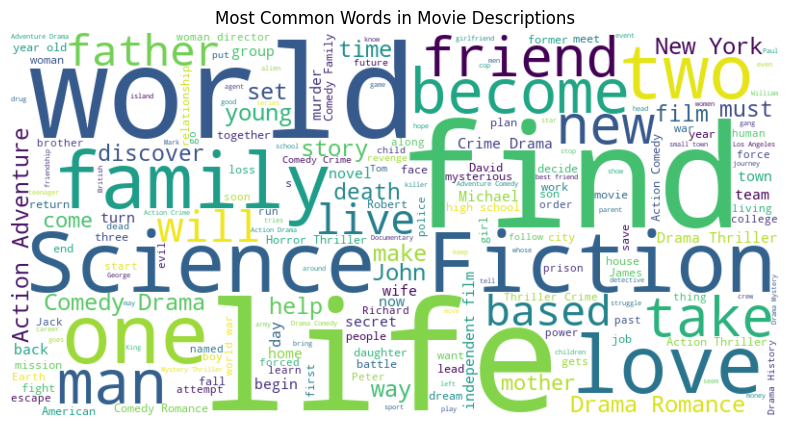

In [33]:
# Display the word cloud

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Movie Descriptions')
plt.show()

In [34]:
## Download NLTK resources

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'[\W]', ' ', text)  # Remove non-alphanumeric characters
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize the text
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [40]:
## Preprocess the text

data['clean_text'] = data['combined_features'].apply(preprocess_text)

data.head(3)

C:\Users\Acer\AppData\Local\Temp\ipykernel_30596\1579033922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text'] = data['combined_features'].apply(preprocess_text)


,title,combined_features,clean_text
0,Avatar,"In the 22nd century, a paraplegic Marine is di...",22nd century paraplegic marine dispatched moon...
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",captain barbossa long believed dead come back ...
2,Spectre,A cryptic message from Bond’s past sends him o...,cryptic message bond past sends trail uncover ...


In [41]:
## TF-IDF Vectorization

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

tfidf_matrix = tfidf_vectorizer.fit_transform(data['clean_text'])

In [42]:
## Calculate cosine similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [51]:
def get_recommendations(movie_name, cosine_sim=cosine_sim, df=data, top_n=5):
    idx = df[df['title'].str.lower() == movie_name.lower()].index  # Get the index of the movie with the given title
    if len(idx) == 0:
        return "Movie not found in the dataset."
    idx = idx[0]
    
    sim_scores = list(enumerate(cosine_sim[idx]))  # Get the similarity scores for the movie
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)  # Sort the movies based on similarity scores
    sim_scores = sim_scores[1:top_n+1]  # Get the top N most similar movies (excluding the movie itself)
    
    movie_indices = [i[0] for i in sim_scores]  # Get the indices of the recommended movies
    recommended_movies = df['title'].iloc[movie_indices]  # Get the titles of the recommended movies
    
    return recommended_movies


In [52]:
data['title']

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4370                                        Bang
4371                                      Primer
4372                                 El Mariachi
4373                   Signed, Sealed, Delivered
4374                           My Date with Drew
Name: title, Length: 4375, dtype: object

In [53]:
row_index = df[df['title'] == 'The Dark Knight'].index
print(row_index)

Index([65], dtype='int64')


In [54]:
movie_name = data['title'][65]
print(movie_name)

The Dark Knight


In [55]:
print(f"Recommendation for the movie {movie_name}")
recommendations = get_recommendations(movie_name)
print(recommendations)

Recommendation for the movie The Dark Knight
3                         The Dark Knight Rises
117                               Batman Begins
424                              Batman Returns
297                              Batman Forever
3623    Batman: The Dark Knight Returns, Part 2
Name: title, dtype: object
